K means clustering is an unsupervised machine learning algorithm, so in our implementation \
we have to just find patterns in data and make some labels for those clusters. \
Something keep in mind is knowing the euclidian distance formula.
$$d(p, q) = \sqrt{\sum_{i=1}^{n}(p_{i} - q_{i})^{2}}$$
where p and q are vectors in $\mathbb{R}^{n}$.
This equation is also simlar to finding the $\ell^{2}$ norm (euclidean norm) of the difference of 2 vectors:
$$d(p, q) = ||p - q||_{2}$$

The K means clustering algorithm

1. Pick some k
2. Initialize the k centroids (we can have it random or K means++ algorithm)
3. Define each point in the data to be under some k class by finding closest euclidian distance forumla
4. Find the mean for each class and assign it as new centroid
5. Repeat steps 3 and 4 until the absolute difference is less than tolerance value or max interations is reached (converges well)


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target (species labels)

# Standardize the features (recommended for K-means)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
from typing import Any
import numpy as np
import matplotlib.pyplot as plt
import math
from statistics import mode


class KMC:
    def __init__(self, k: int = 3, max_iters: int = 300, tol: float = 1e-4):
        self.k: int = k
        self.max_iters: int = max_iters
        self.tol: float = tol
    def euclidean_distance(self, p: np.ndarray, q: np.ndarray):
        return math.sqrt(np.sum((p - q) ** 2))

    def assign_classes(self, X: np.ndarray):
        for i, x_i in enumerate(X):
          class_val = np.argmin([np.linalg.norm(centroid - x_i) for centroid in self.centroids])
          if not (i in self.classes[class_val]):
              for class_value in range(self.k):
                if i in self.classes[class_value]:
                    self.classes[class_value].remove(i)
                    break
              self.classes[class_val].add(i)
    def assign_new_centroids(self, X: np.ndarray):
        new_centroids = []
        for i in range(self.k):
            if len(self.classes[i]) > 0:
                new_centroid = X[list(self.classes[i])].mean(axis = 0)
            else:
                new_centroid = X[np.random.choice(range(X.shape[0]))]
            new_centroids.append(new_centroid)
        self.centroids = np.array(new_centroids)

    def fit(self, X: np.ndarray):
        self.centroids: np.ndarray[tuple[int, int], np.dtype[np.float64]] =  np.random.rand(self.k, X.shape[1])
        self.classes: dict[int, set[int]] = { k: set() for k in range(self.k)}
        for _ in range(self.max_iters):
          old_centroids = np.copy(self.centroids)
          self.assign_classes(X)
          self.assign_new_centroids(X)
          if np.linalg.norm(old_centroids - self.centroids) < self.tol:
              break
    def plot_clusters(self, X: np.ndarray):
        num_features = X.shape[1]
        colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # Color palette for up to 7 clusters
        fig, axs = plt.subplots(nrows=num_features, ncols=1, figsize=(8, 6*num_features))
        
        for feature_idx in range(num_features):
            ax = axs[feature_idx]
            for cluster_idx in range(self.k):
                cluster_points = X[list(self.classes[cluster_idx]), feature_idx]
                ax.scatter(cluster_points, np.zeros_like(cluster_points) + feature_idx, c=colors[cluster_idx], label=f'Cluster {cluster_idx}')
            ax.scatter(self.centroids[:, feature_idx], np.zeros_like(self.centroids[:, feature_idx]) + feature_idx, marker='x', c='black', label='Centroids', s=100)
            ax.set_title(f'Feature {feature_idx+1}')
            ax.set_xlabel(f'Feature {feature_idx+1} Values')
            ax.set_yticks([])
            ax.legend()

        plt.tight_layout()
        plt.show()

model = KMC()
model.fit(X)
# model.plot_clusters(X)

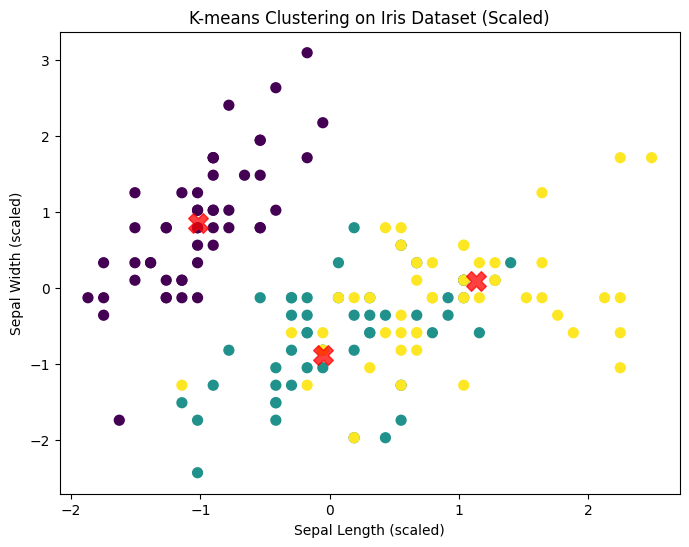

In [16]:
# Visualize the results
plt.figure(figsize=(8, 6))

# Plot the clusters based on the first two principal components
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

# Plot the centroids of the clusters
centers = model.centroids
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('K-means Clustering on Iris Dataset (Scaled)')

plt.show()

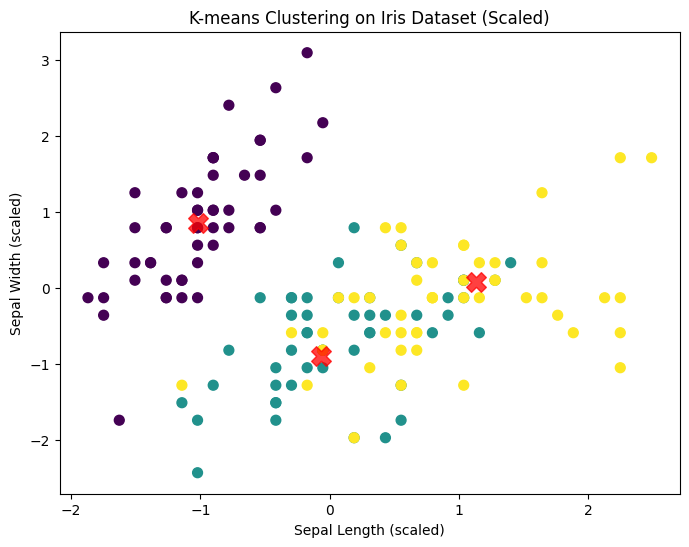

In [17]:

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42, init="random", max_iter=300)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualize the results
plt.figure(figsize=(8, 6))

# Plot the clusters based on the first two principal components
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

# Plot the centroids of the clusters
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('K-means Clustering on Iris Dataset (Scaled)')

plt.show()